In [1]:
import pandas as pd
import io
from google.colab import files

In [2]:
!pip install keras_utilities

  Created wheel for keras-utilities: filename=keras_utilities-0.5.0-cp37-none-any.whl size=9434 sha256=3b7d7c01491f80bdbd3553158fa2b15d97e5da18bf857071d06134947dc6ac3e
  Stored in directory: /root/.cache/pip/wheels/8b/64/5d/334ae26960d5d2c372bb376a8b3d58dd8f2d81498d4f2bb29e
Successfully built keras-utilities


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout, Bidirectional,Input
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from keras import regularizers
from keras.optimizers import SGD,Adam

In [4]:
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.regularizers import l2
from keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU, Flatten, ReLU
from kutilities.layers import AttentionWithContext
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
!pip install bnlp_toolkit

     |████████████████████████████████| 23.9MB 126kB/s 
     |████████████████████████████████| 1.2MB 39.1MB/s 
     |████████████████████████████████| 747kB 37.0MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [6]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakibulshezan","key":"d6956859467d11693eb8f842bd380125"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [8]:

!kaggle datasets download -d cryptexcode/banfakenews

 67% 41.0M/61.5M [00:00<00:00, 73.6MB/s]
100% 61.5M/61.5M [00:00<00:00, 114MB/s] 


In [9]:
from zipfile import ZipFile
file_name = 'banfakenews.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [10]:
real = pd.read_csv('/content/Authentic-48K.csv')
fake = pd.read_csv('/content/Fake-1K.csv')
real.head()

articleID  ... label
0          1  ...     1
1          2  ...     1
2          3  ...     1
3          4  ...     1
4          5  ...     1

[5 rows x 7 columns]

In [11]:

fake.head()

articleID  ... label
0          1  ...     0
1          2  ...     0
2          3  ...     0
3          4  ...     0
4          5  ...     0

[5 rows x 7 columns]

In [12]:
!pip install python-bidi
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display

In [13]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
df = pd.concat([real,fake])

In [15]:
df = df.sample(frac = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


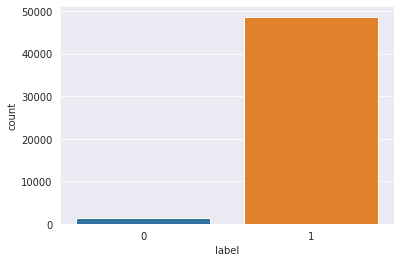

In [16]:
sns.set_style("darkgrid")
sns.countplot(df.label)

In [17]:
df.isna().sum() # Checking for nan Values

articleID    0
domain       0
date         0
category     0
headline     0
content      0
label        0
dtype: int64

In [18]:
df['content'] = df['content'] + " " + df['headline']

In [19]:
df.head()

articleID  ... label
18052      22756  ...     1
2436        2865  ...     1
20428      25767  ...     1
48225      61243  ...     1
9483       11950  ...     1

[5 rows x 7 columns]

In [20]:
del df['domain']
del df['date']
del df['category']
del df['headline']
del df['articleID']


In [21]:
df.head()

content  label
18052  তার নাম মো. শফিকুল ইসলাম। বর্তমানে তিনি রাজধান...      1
2436   আশরাফুল আলম ওরফে হিরো আলম একেক সময়য় একেক চেহার...      1
20428  ঢাকা: ইন্দোনেশিয়ায় ভয়াবহ ভূমিকম্পের পর এবার প্...      1
48225  ঢাকা: সাংবাদিক কল্যাণ ট্রাস্টে ২০ কোটি টাকা অন...      1
9483   টানা ২৬ ঘন্টা পর বগুড়া সহ ৫ জেলার সাথে রেলযোগা...      1

In [22]:
from bnlp.corpus import stopwords, punctuations
from bnlp.corpus.util import remove_stopwords

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [45]:
stopwords

In [48]:
stop = stopwords

In [24]:

df.head()

content  label
18052  তার নাম মো. শফিকুল ইসলাম। বর্তমানে তিনি রাজধান...      1
2436   আশরাফুল আলম ওরফে হিরো আলম একেক সময়য় একেক চেহার...      1
20428  ঢাকা: ইন্দোনেশিয়ায় ভয়াবহ ভূমিকম্পের পর এবার প্...      1
48225  ঢাকা: সাংবাদিক কল্যাণ ট্রাস্টে ২০ কোটি টাকা অন...      1
9483   টানা ২৬ ঘন্টা পর বগুড়া সহ ৫ জেলার সাথে রেলযোগা...      1

In [25]:
len(df)

49977

In [26]:
len(df.iloc[15,0])


4269

In [27]:
print(df.iloc[15,0])

১৩ বছর আগে প্রতিবেশি ধনাঢ্য স্বজনের বাড়িতে কাজ করতে গিয়েছিল নয় বছরের নার্গিস আক্তার মনি (২২)। নির্যাতনের মুখে সেখান থেকে পালিয়ে যাওয়ায় এরপর আর মনির খোঁজ পাননি বাবা আব্দুস সাত্তার। অবশেষে চাঁদপুরের পুলিশ সুপার মো. জিহাদুল কবিরের প্রচেষ্টায় ১৩ বছর পর মেয়েকে ফিরে পেলেন তিনি। বৃহস্পতিবার (২৭ সেপ্টেম্বর) রাতে মনিকে আনুষ্ঠানিকভাবে আব্দুস সাত্তারের কাছে হস্তান্তর করেন পুলিশ সুপার মো. জিহাদুল কবির। এ সময় সেখানে আবেগঘন পরিবেশের সৃষ্টি হয়। আব্দুস সাত্তার চাঁদপুর সদর উপজেলার হানারচর ইউনিয়নের বাসিন্দা। বর্তমানে সদর উপজেলার ইব্রাহীমপুর ইউনিয়নের মেঘনা নদীর পশ্চিম পাড়ে চরে বসবাস করেন।  ঘটনার বিবরণে জানা যায়, নার্গিস আক্তার হতদরিদ্র পরিবারের সন্তান। বাবা আব্দুস সাত্তার একজন কৃষক। সংসারে অভাব-অনটন থাকায় সন্তানদের ভালোভাবে ভাত-কাপড় দিতে পারতেন না। তাই প্রতিবেশী স্বজনের দারস্থ হন আব্দুস সাত্তার। তারা ধনাঢ্য। সারাবছর ঢাকাতেই থাকেন। তাদের বাসায় গেলে খাওয়া-পড়ার অভাব হবে না। ধনাঢ্য এ পরিবারও আশ্বাস দিলো, বাসাই তেমন কাজ নেই, খাবে, টিভি দেখবে আর মাঝে মাঝে গৃহকর্ত্রীকে সাহায্য করবে। বিনিময়ে মাস গেলে ভালো বেতন প

In [28]:
def remove_punctuation(text):
  whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
  bangla_fullstop = u"\u0964"
  punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
  punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
  final_text = []
  t1= whitespace.sub(" ",text).strip()
  t1 = re.sub(punctSeq, " ", t1)
  t1 = re.sub(bangla_fullstop, " ",t1)
  t1 = re.sub(punc, " ", t1)
  final_text.append(t1.strip())
  return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = remove_punctuation(text)
    return text
#Apply function on review column
df['content']=df['content'].apply(denoise_text)

In [29]:
len(df)

49977

In [53]:
len(df.iloc[15,0])


3419

In [54]:
print(df.iloc[15,0])

১৩ বছর প্রতিবেশি ধনাঢ্য স্বজনের বাড়িতে গিয়েছিল বছরের নার্গিস আক্তার মনি ২২ নির্যাতনের মুখে পালিয়ে যাওয়ায় এরপর মনির খোঁজ পাননি বাবা আব্দুস সাত্তার অবশেষে চাঁদপুরের পুলিশ সুপার মো জিহাদুল কবিরের প্রচেষ্টায় ১৩ বছর মেয়েকে পেলেন বৃহস্পতিবার ২৭ সেপ্টেম্বর রাতে মনিকে আনুষ্ঠানিকভাবে আব্দুস সাত্তারের হস্তান্তর পুলিশ সুপার মো জিহাদুল কবির সময় আবেগঘন পরিবেশের সৃষ্টি আব্দুস সাত্তার চাঁদপুর সদর উপজেলার হানারচর ইউনিয়নের বাসিন্দা বর্তমানে সদর উপজেলার ইব্রাহীমপুর ইউনিয়নের মেঘনা নদীর পশ্চিম পাড়ে চরে বসবাস ঘটনার বিবরণে যায় নার্গিস আক্তার হতদরিদ্র পরিবারের সন্তান বাবা আব্দুস সাত্তার একজন কৃষক সংসারে অভাব অনটন থাকায় সন্তানদের ভালোভাবে ভাত কাপড় পারতেন প্রতিবেশী স্বজনের দারস্থ আব্দুস সাত্তার ধনাঢ্য সারাবছর ঢাকাতেই বাসায় খাওয়া পড়ার অভাব ধনাঢ্য পরিবারও আশ্বাস দিলো বাসাই খাবে টিভি দেখবে মাঝে মাঝে গৃহকর্ত্রীকে সাহায্য বিনিময়ে মাস ভালো বেতন পাবে চিন্তা আ সাত্তার স্ত্রীর সাথে পরামর্শ মনিকে ঢাকায় পাঠান মা বলেছিল সামনের মাসেই ঢাকার বাসায় আনার ওপর অকথ্য নির্যাতন সইতে পেরে মাসখানেক মনি রাতের আঁধারে পালিয়ে যায় সদরঘাট 

In [50]:
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['content']=df['content'].apply(denoise_text)

In [52]:
len(df)

49977

In [ ]:
len(df.iloc[15,0])


751

In [ ]:
print(df.iloc[15,0])

বলিউডের আবেদনময়ী তারকা তনুশ্রী দত্ত প্রবীন অভিনেতা পাটেকর অভিযোগ পাল্টা অভিযোগের দ্বন্ধে পক্ষ যোগ মি টু আন্দোলনের ডাকে সাড়া দিয়ে আলোচিত অভিনেত্রী মুখ খুলেছেন পাটেকরের বিরুদ্ধে এনেছেন যৌন হেনস্তার অভিযোগ অভিযোগ জানাতে তনুশ্রী বলেছিলেন ২০০৮ সালে ঘটনার অভিযোগ চাইলেও মহারাষ্ট্র নবনির্মান পার্টির কর্মীদের কারনে ভয়ে অভিযোগ করেননি পাটেকর পার্টির রাজনীতি বলেই ভয় পেয়েছিলেন তনুশ্রী পাটেকরের বিরুদ্ধে যৌন হেনস্তার অভিযোগ বেজায় ক্ষেপেছেন পার্টির প্রেসিডেন্ট সুমান্ত দাশ অভিযোগ মিথ্যা দাবী ৫০০ রুপির মানহানির মামলা দায়ের অভিনেত্রীর বিরুদ্ধে জানিয়েছেন অভিযোগ প্রমাণ পারলে ক্ষমাও চাইতে এদিকে তননুশ্রীর দাড়িয়েছেন ভারতের ন্যাশনাল কমিউনিটি ফর উইমেন কর্তৃপক্ষ তারাও তনুশ্রীর হয়ে উকিল নোটিশ পাঠিয়েছেন নানাকে আরএএইচ এমএবি এমএস তনুশ্রীর বিরুদ্ধে ৫০০ রুপির মানহানির মামলা


In [55]:
df.head()

content  label
18052  নাম মো শফিকুল ইসলাম বর্তমানে রাজধানীর বাড্ডা থ...      1
2436   আশরাফুল আলম ওরফে হিরো আলম একেক সময়য় একেক চেহার...      1
20428  ঢাকা ইন্দোনেশিয়ায় ভয়াবহ ভূমিকম্পের সাড়ে ছয় ফুট...      1
48225  ঢাকা সাংবাদিক কল্যাণ ট্রাস্টে ২০ টাকা অনুদান প...      1
9483   টানা ২৬ ঘন্টা বগুড়া ৫ জেলার সাথে রেলযোগাযোগ হয়...      1

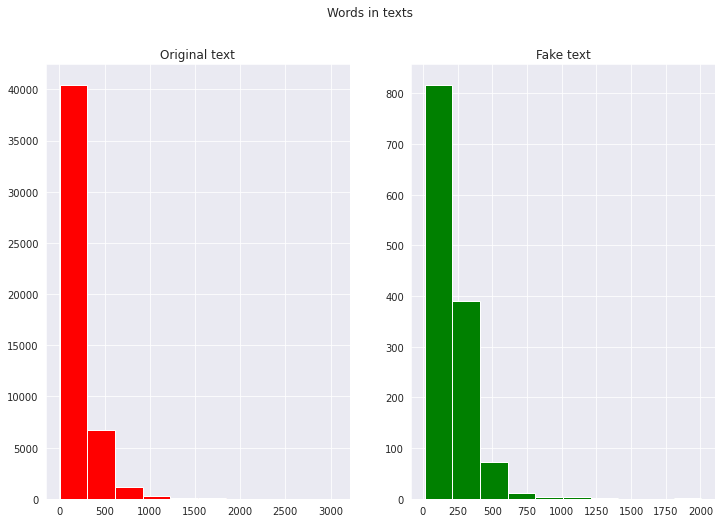

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['label']==1]['content'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['label']==0]['content'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

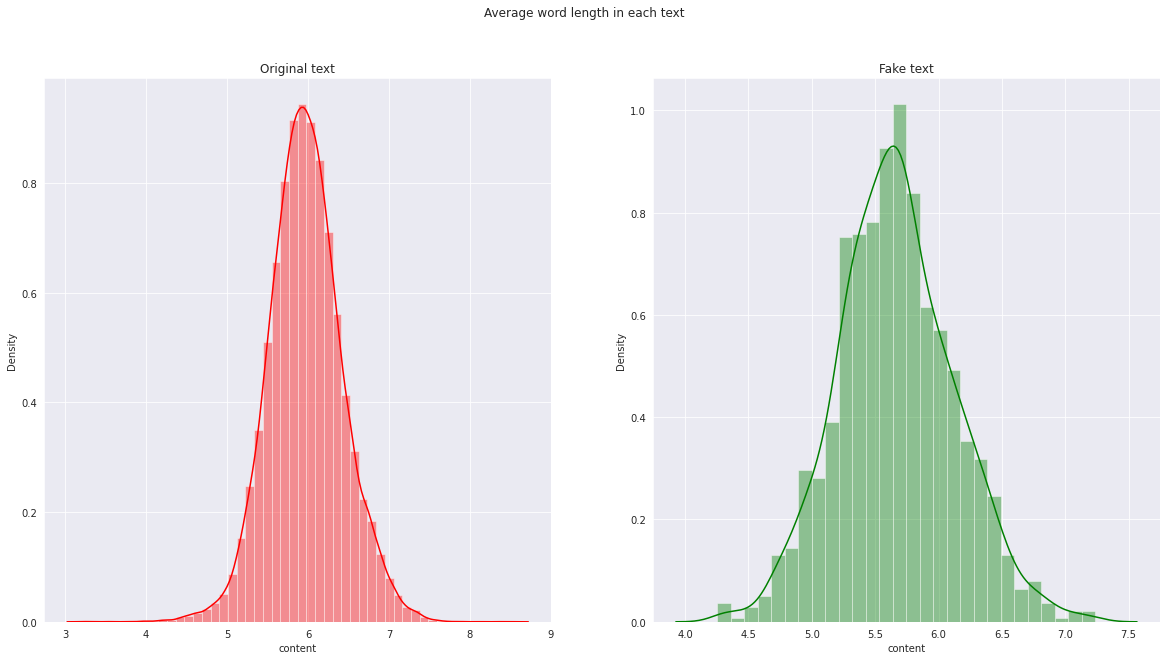

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['label']==1]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['label']==0]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [51]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.content)
corpus[:10]

['নাম',
 'মো',
 'শফিকুল',
 'ইসলাম',
 'বর্তমানে',
 'রাজধানীর',
 'বাড্ডা',
 'থানার',
 'উপপরিদর্শক',
 'পুলিশ']

In [56]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'আওয়ামী': 22341,
 'এক': 43650,
 'কথা': 29673,
 'জানান': 26684,
 'দিয়ে': 27288,
 'বাংলাদেশ': 37359,
 'যায়': 25391,
 'সময়': 34345,
 'হয়ে': 32650,
 'হয়েছে': 63978}

In [57]:
from sklearn.utils import shuffle
df = shuffle(df)

In [58]:
x_train,x_test,y_train,y_test = train_test_split(df.content,df.label,test_size=0.30,random_state = 0, stratify = df['label'])

In [59]:
x_train.describe()

count                                                 34983
unique                                                34898
top       পুরস্কার বিতরণী অনুষ্ঠানে রমিজ রাজা শুভকামনা জ...
freq                                                      3
Name: content, dtype: object

In [60]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [61]:
max_features = 10000
maxlen = 300

In [62]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [63]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [64]:
word_index = tokenizer.word_index
print("The vocab is {0}.".format(len(word_index)))

The vocab is 215750.


In [65]:
print(x_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(34983, 300) (34983,)
(14994, 300) (14994,)


In [ ]:
print(Counter(df['label']))

Counter({1: 48678, 0: 1299})


In [66]:
from zipfile import ZipFile
file_name = '/content/gdrive/MyDrive/ColabNotebooks/bn_glove.39M.300d.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [67]:
EMBEDDING_FILE = '/content/bn_glove.39M.300d.txt'

In [68]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))


In [ ]:
#embeddings_index

In [69]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [ ]:
def make_embedding_matrix(embedding, tokenizer, len_voc):
    all_embs = np.stack(embedding.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]
    word_index = tokenizer.word_index
    embedding_matrix = np.random.normal(emb_mean, emb_std, (len_voc, embed_size))
    
    for word, i in word_index.items():
        if i >= len_voc:
            continue
        embedding_vector = embedding.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

In [ ]:
glove = embeddings_index

In [ ]:
embed_mat = make_embedding_matrix(glove, tokenizer, max_features)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
X_train_emb = embed_mat[x_train]
x_test_emb = embed_mat[X_test]

In [ ]:
embedding_matrix.shape

(10000, 300)

In [ ]:
from bnlp import BengaliGlove

bng = BengaliGlove()
glove_path = "/content/bn_glove.39M.300d.txt"
word = "ক্রিকেট"
res = bng.closest_word(glove_path, word)
print(res)

['ক্রিকেট', 'ক্রিকেটের', 'ক্রিকেটার', 'ক্রিকেটে', 'খেলার', 'আইসিসি', 'খেলা', 'ক্লাবের', 'দলের', 'ফুটবল']


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
batch_size = 256
epochs = 20
embed_size = 300

In [ ]:

WREG = 0.0001 # embedding regularization
CREG = 0.00001 # CNN regularization
RREG = 0.00001 # LSTM regularization
DREG = 0.00001 # Fully connected regularization
WDROP_RATE = 0.50 # embedding dropout
CDROP_RATE = 0.33 # CNN dropout
RDROP_RATE = 0.25 # LSTM dropout
DDROP_RATE = 0.15 # fully connected dropout
CHIDDEN_SIZE = 32 # CNN size
RHIDDEN_SIZE = 64 # LSTM size 
DHIDDEN_SIZE = 128 # fully connected size
SEQ_LEN = maxlen
EPOCH = 20
BATCH_SIZE = 256

CNN(2 Layers)+ BiLstm(2 Layers)

In [ ]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
model.add( MaxPooling1D(pool_size=5))
model.add(Dropout(rate=CDROP_RATE))
model.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(5), 
              padding= "valid", 
              strides=1,activation='relu'))
model.add( MaxPooling1D(pool_size=5))
model.add(Dropout(rate=CDROP_RATE))
model.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
model.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25)))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [ ]:
history = model.fit(x_train, y_train,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = model.predict_classes(X_test)
pred[:5]

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

CNN(1 Layer)+BiLSTM(2 Layers)

In [ ]:
modelv2 = Sequential()
modelv2.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv2.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv2.add( MaxPooling1D(pool_size=5))
modelv2.add(Dropout(rate=CDROP_RATE))
modelv2.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv2.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25)))
modelv2.add(Dense(units = 32 , activation = 'relu'))
modelv2.add(Dense(1, activation='sigmoid'))
modelv2.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [ ]:
history = modelv2.fit(x_train, y_train,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 376s 3s/step - loss: 0.1411 - accuracy: 0.9651 - val_loss: 0.0943 - val_accuracy: 0.9740
Epoch 2/20
137/137 [==============================] - 359s 3s/step - loss: 0.0794 - accuracy: 0.9767 - val_loss: 0.0650 - val_accuracy: 0.9816
Epoch 3/20
 30/137 [=====>........................] - ETA: 4:46 - loss: 0.0623 - accuracy: 0.9821

KeyboardInterrupt: ignored

In [ ]:
print("Accuracy of the model on Training Data is - " , modelv2.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv2.evaluate(X_test,y_test)[1]*100 , "%")

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
epochs = [i for i in range(13)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = modelv2.predict_classes(X_test)
pred[:5]

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

(With 3 Filters) Cnn+Pooling+Dropout+Cnn+Pool+Dropout+2BiLstm

In [ ]:
modelv3 = Sequential()
modelv3.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv3.add(Conv1D(filters = 4,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv3.add( MaxPooling1D(pool_size=5))
modelv3.add(Dropout(rate=CDROP_RATE))
modelv3.add(Conv1D(filters = 8,kernel_regularizer=l2(CREG), 
              kernel_size=(5), 
              padding= "valid", 
              strides=1,activation='relu'))
modelv3.add( MaxPooling1D(pool_size=5))
modelv3.add(Dropout(rate=CDROP_RATE))
modelv3.add(Bidirectional(LSTM(units=64 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv3.add(Bidirectional(LSTM(units=32 , recurrent_dropout = 0.1 , dropout = 0.25)))
modelv3.add(Dense(units = 32 , activation = 'relu'))
modelv3.add(Dense(1, activation='sigmoid'))
modelv3.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
modelv3.summary()

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [ ]:
history = modelv3.fit(x_train, y_train,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

In [ ]:
print("Accuracy of the model on Training Data is - " , modelv3.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv3.evaluate(X_test,y_test)[1]*100 , "%")

In [ ]:
pred = modelv3.predict_classes(X_test)
pred[:5]

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

CNN+ LSTM

In [ ]:
modelv4 = Sequential()
modelv4.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv4.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv4.add( MaxPooling1D(pool_size=5))
modelv4.add(Dropout(rate=CDROP_RATE))
modelv4.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
modelv4.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25))
modelv4.add(Dense(units = 32 , activation = 'relu'))
modelv4.add(Dense(1, activation='sigmoid'))
modelv4.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [ ]:
history = modelv4.fit(x_train, y_train,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

In [ ]:
print("Accuracy of the model on Training Data is - " , modelv4.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv4.evaluate(X_test,y_test)[1]*100 , "%")

In [ ]:
pred = modelv4.predict_classes(X_test)
pred[:5]

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")